In [23]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('.', one_hot=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


In [4]:
import tensorflow as tf
sess = tf.InteractiveSession()
sess

In [20]:
def weight_variable(shape):
  initial = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(initial)

def bias_variable(shape):
  initial = tf.constant(0.1, shape=shape)
  return tf.Variable(initial)

def conv2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

def max_pool_2x2(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)


W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)


keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(y_conv, y_))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)
correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(tf.global_variables_initializer())




In [22]:
for i in range(2000):
  batch = mnist.train.next_batch(50)
  if i%100 == 0:
    train_accuracy = accuracy.eval(feed_dict={
        x:batch[0], y_: batch[1], keep_prob: 1.0})
    print("step %d, training accuracy %g"%(i, train_accuracy))
  train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

step 0, training accuracy 0.94
step 100, training accuracy 0.96
step 200, training accuracy 1
step 300, training accuracy 1
step 400, training accuracy 1
step 500, training accuracy 0.98
step 600, training accuracy 0.94
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 0.96
step 1000, training accuracy 1
step 1100, training accuracy 1
step 1200, training accuracy 0.96
step 1300, training accuracy 0.98
step 1400, training accuracy 0.98
step 1500, training accuracy 1
step 1600, training accuracy 0.98
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 0.98
test accuracy 0.9846


In [ ]:
plt.imshow(w)

[[-1.9658947   0.36784822  2.14265966 -0.71165973 -1.07351971  2.34784865
  -0.04257324  0.06762873 -0.41901627 -0.71427077]]
[5]


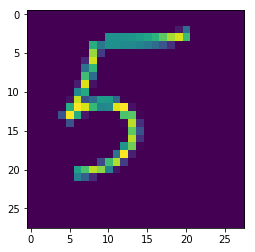

[[ 5.79597616 -0.78529537  2.3366518  -0.52434492 -1.09885323 -0.82883054
  -0.65967029  0.31002003  1.31452906 -1.39040387]]
[0]


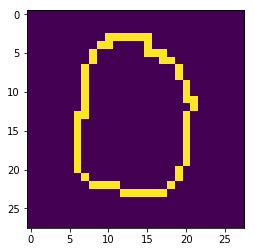

[[-2.08262181 -5.63539505  4.68703222  9.09414864 -2.81302381 -0.16522972
  -3.8634944  -2.99561357 -2.6960392  -1.82010233]]
[3]


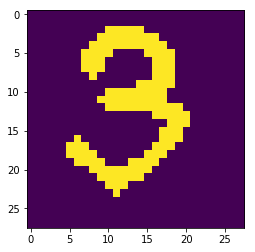

[[ -2.30968952  -1.71610749  -2.04624248  -3.84263444  12.67681313
   -4.83651304  -3.90477014   0.30780098  -2.59933639   4.13238096]]
[4]


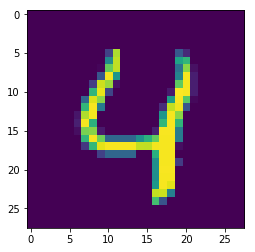

In [38]:
def match(img):
    # print(mnist.test.images[0])
    print(sess.run(y_conv, feed_dict={x: [img], keep_prob: 1}))
    print(sess.run(tf.argmax(y_conv, 1), feed_dict={x: [img], keep_prob: 1}))

    plt.imshow(np.split(img, 28))
    plt.show()
    
    
match(1 - mpimg.imread('digit.png').reshape([784, 3])[:, 1])
match(1 - mpimg.imread('data.png').reshape([784, 3])[:, 1])

match(1 - mpimg.imread('data1.png').reshape([784, 3])[:, 1])

match(mnist.test.images[4])

tf.argmax?

